<a href="https://colab.research.google.com/github/valeriafigueredo-data/modelos_preditivos_classicos/blob/main/Projeto_final_MPC_Classifica%C3%A7%C3%A3o_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

Nome: Valéria Cristina A.R. de Figueredo

Disciplina: Modelos Preditivos Clássicos

Nessa seção iremos importar as bibliotecas necessárias

In [897]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Carregar a base de dados

Abaixo iremos carregar a base de dados "Non verbal tourists data DataSet".
Disponível em: https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv

Obs: iremos considerar a variável de saída: **Tipo/classe do cliente**

In [898]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00620/non-verbal%20tourist%20data.csv")

### 2. Dicionário dos Dados

**Dicionário dos dados**

Um total de 73 clientes, com idades entre 24 e 81 anos, foram entrevistados. Dentre os clientes entrevistados, 38 eram clientes retornantes e 35 eram novos clientes. As variáveis escolhidas são as essenciais que compõem o sistema de comunicação não verbal. Além de serem as mais viáveis para avaliar os clientes, o sistema não verbal é composto por subsistemas como a cinésica, a paralinguagem, a proxêmica, a crônica e outros. Na elaboração do questionário, os indicadores que compõem esses subsistemas foram levados em consideração para serem explorados como parte das preferências de comunicação dos clientes, além de serem viáveis para avaliação. As 22 variáveis analisadas foram consideradas viáveis para serem avaliadas pela clientela do hotel.

**Variables Table**

**Variable Name	--   Type      -- Description	**


1.sex	      --   Binary    -- Sex of the client

2.age	      --  Integer	   -- Age of the client

3.country	      --  Categorical--	Country of the client

4.returning	    --  Binary		 -- If the client is returning

5.GImg1	        -- Categorical --	Handshake Indifferent

6.GImg2	        -- Categorical -- Hug indifferent

7.GImg3	        -- Categorical -- Kiss indifferent

8.PImg1	        -- Categorical --	Consent posture

9.PImg2	        -- Categorical -- Interest posture

10.PImg3	        -- Categorical --	Neutral posture

11.PImg4	        -- Categorical -- Reflexive posture

12.PImg5	        -- Categorical	--	Negative posture

13.Tense-relaxed	-- Integer	   --	Emotinonal (1-too tense, 10 - too relaxed)

14.Authoritative-anarchic-- Integer -- Emotional(1- too authoritative, 10 - too anarchic)

15.Hostile - friendly --Integer	-- Emotional (1 - too hostile, 10 - too friendly)

16.TAudio1	          -- Categorical -- Authoritative

17.TAudio2	          -- Categorical -- Sarcastic

18.TAudio3	          -- Categorical -- Friendly

19.QAudio1	          -- Categorical -- Spitting

20.QAudio2	          -- Categorical -- Hum

21.QAudio3	          -- Categorical -- Sigh

22.Proxemics	        -- Categorical -- Physical distance preferred for the client (A. intimate: 15cm-45cm; B. per-sonal: 46cm-122cm; C. social: 123cm-360cm; D. public: > 360cm)

23.Type of Client	  -- Categorical -- Type of client


###Tratamento dos dados

Tratamento dos valores "?" presente em algumas colunas. Use a estratégia que for mais confortável.

Dica: Use a função `replace`.

In [899]:
df. head(20)

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,...,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0
5,F,31,canada,yes,likes,likes,likes,likes,likes,likes,...,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
6,M,64,canada,yes,indiferent,likes,likes,likes,likes,indiferent,...,10,2,B,dislikes,dislikes,likes,indiferent,dislikes,dislikes,1
7,M,51,argentina,yes,likes,likes,likes,likes,likes,indiferent,...,9,1,B,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
8,F,28,hungary,no,likes,likes,likes,likes,likes,indiferent,...,3,3,C,indiferent,dislikes,likes,indiferent,dislikes,dislikes,1
9,M,78,england,yes,likes,likes,likes,likes,likes,likes,...,3,2,A,dislikes,indiferent,likes,dislikes,likes,indiferent,2


In [900]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     object
 4   GImg1                     73 non-null     object
 5   GImg2                     73 non-null     object
 6   GImg3                     73 non-null     object
 7   PImg1                     73 non-null     object
 8   PImg2                     73 non-null     object
 9   PImg3                     73 non-null     object
 10  PImg4                     73 non-null     object
 11  PImg5                     73 non-null     object
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     object
 14  Hostile - friendly        73

São 23 colunas originais, com 73 linhas. Logo, os dados estão bem regulares perante todo o dataframe.

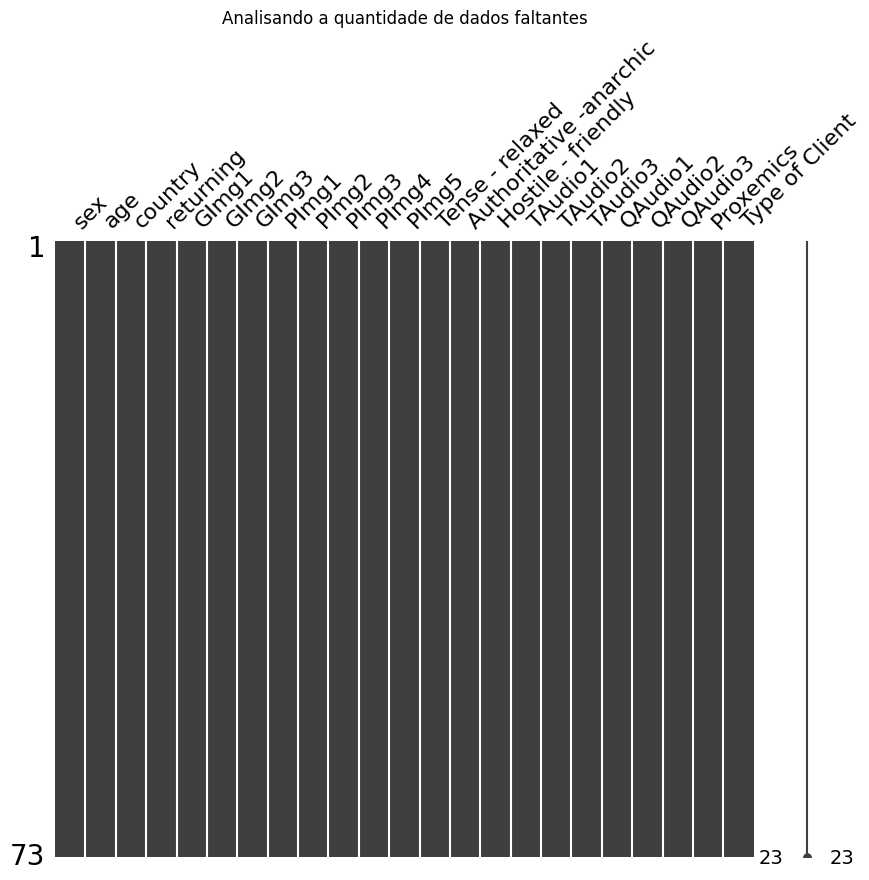

In [901]:
msno.matrix(df, figsize=(10,8))
plt.title("Analisando a quantidade de dados faltantes")
plt.show()

Portanto, não há dados faltantes.

Quando analisado  o dataframe e o dicionário dos dados, notou-se que as colunas Proxemics e a TAudio1 tiveram seus dados trocados. Portanto, abaixo será realizada a troca no dataframe.

In [902]:
df[['TAudio1','Proxemics']] = df[['Proxemics','TAudio1']]

O conteúdo das colunas que possuiam o símbolo "?" será substituido pela palavra 'unknown' (desconhecido).

In [903]:
df.replace('?', 'unknown', inplace=True)

A seguir será substituído os valores categóricos (
Male, Female, Indifferent, likes, dislikes) por valores numéricos.
Dica: leia a [página](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) da documentação da biblioteca Pandas.


In [904]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [905]:
description = df['sex'].describe()
print(description)

count     73
unique     2
top        F
freq      38
Name: sex, dtype: object


In [906]:
le = preprocessing.LabelEncoder()

In [907]:
le.fit(df['sex'])

LabelEncoder()

In [908]:
df['sex_le'] = le.transform(df['sex'])

In [909]:
df['sex_le'].unique()

array([0, 1])

Após a categorização, Sex_le transformou M em 1 e F em 0

 Agora as palavras "Indifferent, likes, dislikes" serão substituídas por valores numéricos.

In [910]:
sensation_columns = ['GImg1', 'GImg2', 'GImg3',
                    'PImg1', 'PImg2', 'PImg3', 'PImg4', 'PImg5',
                    'TAudio1', 'TAudio2', 'TAudio3',
                    'QAudio1', 'QAudio2', 'QAudio3']

In [911]:
df[sensation_columns].head()

,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3
0,likes,indiferent,indiferent,likes,likes,indiferent,indiferent,dislikes,dislikes,dislikes,dislikes,indiferent,dislikes,dislikes
1,likes,indiferent,indiferent,likes,likes,likes,likes,unknown,dislikes,dislikes,dislikes,likes,likes,dislikes
2,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,dislikes,dislikes,dislikes,likes,dislikes,dislikes
3,likes,dislikes,dislikes,likes,likes,indiferent,indiferent,dislikes,dislikes,dislikes,dislikes,likes,dislikes,indiferent
4,indiferent,indiferent,indiferent,likes,likes,indiferent,likes,dislikes,dislikes,dislikes,dislikes,likes,indiferent,dislikes


In [912]:
pd.crosstab(**df[sensation_columns].melt(var_name='columns', value_name='index'))

columns,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,PImg4,PImg5,QAudio1,QAudio2,QAudio3,TAudio1,TAudio2,TAudio3
index,,,,,,,,,,,,,,
dislikes,6,12,12,0,0,18,15,70,4,62,60,63,59,56
indiferent,17,22,19,3,0,10,17,1,5,10,11,8,14,15
likes,50,39,41,70,73,45,41,0,64,1,2,2,0,2
unknown,0,0,1,0,0,0,0,2,0,0,0,0,0,0


In [913]:
df

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client,sex_le
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,3,dislikes,dislikes,dislikes,indiferent,dislikes,dislikes,C,0,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,1,dislikes,dislikes,dislikes,likes,likes,dislikes,B,0,1
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,5,dislikes,dislikes,dislikes,likes,dislikes,dislikes,C,0,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,...,1,dislikes,dislikes,dislikes,likes,dislikes,indiferent,C,0,1
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,3,dislikes,dislikes,dislikes,likes,indiferent,dislikes,C,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,F,36,england,no,indiferent,dislikes,dislikes,likes,likes,dislikes,...,4,dislikes,dislikes,dislikes,likes,dislikes,dislikes,C,4,0
69,M,38,russia,no,dislikes,dislikes,dislikes,likes,likes,dislikes,...,5,dislikes,dislikes,dislikes,dislikes,dislikes,dislikes,C,5,1
70,F,46,canada,no,dislikes,indiferent,indiferent,indiferent,likes,dislikes,...,2,indiferent,dislikes,dislikes,indiferent,indiferent,dislikes,A,5,0
71,M,39,germany,no,dislikes,dislikes,unknown,likes,likes,dislikes,...,4,dislikes,dislikes,dislikes,indiferent,dislikes,dislikes,C,5,1


In [914]:
df = pd.get_dummies(df, columns= sensation_columns, drop_first=True)

In [915]:
features = df.columns.tolist()
print(features)

['sex', 'age', 'country', 'returning', 'Tense - relaxed', 'Authoritative -anarchic ', 'Hostile - friendly', 'Proxemics', 'Type of Client', 'sex_le', 'GImg1_indiferent', 'GImg1_likes', 'GImg2_indiferent', 'GImg2_likes', 'GImg3_indiferent', 'GImg3_likes', 'GImg3_unknown', 'PImg1_likes', 'PImg3_indiferent', 'PImg3_likes', 'PImg4_indiferent', 'PImg4_likes', 'PImg5_indiferent', 'PImg5_unknown', 'TAudio1_indiferent', 'TAudio1_likes', 'TAudio2_indiferent', 'TAudio3_indiferent', 'TAudio3_likes', 'QAudio1_indiferent', 'QAudio1_likes', 'QAudio2_indiferent', 'QAudio2_likes', 'QAudio3_indiferent', 'QAudio3_likes']


In [916]:
columns_to_convert = [
    'GImg1_indiferent', 'GImg1_likes', 'GImg2_indiferent', 'GImg2_likes',
    'GImg3_indiferent', 'GImg3_likes', 'GImg3_unknown', 'PImg1_likes',
    'PImg3_indiferent', 'PImg3_likes', 'PImg4_indiferent', 'PImg4_likes',
    'PImg5_indiferent', 'PImg5_unknown', 'TAudio1_indiferent',
    'TAudio1_likes', 'TAudio2_indiferent', 'TAudio3_indiferent',
    'TAudio3_likes', 'QAudio1_indiferent', 'QAudio1_likes',
    'QAudio2_indiferent', 'QAudio2_likes', 'QAudio3_indiferent',
    'QAudio3_likes'
]


In [917]:
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [918]:
df

,sex,age,country,returning,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,Proxemics,Type of Client,sex_le,...,TAudio1_likes,TAudio2_indiferent,TAudio3_indiferent,TAudio3_likes,QAudio1_indiferent,QAudio1_likes,QAudio2_indiferent,QAudio2_likes,QAudio3_indiferent,QAudio3_likes
0,F,42,uruguay,no,4,8,3,C,0,0,...,0,0,0,0,1,0,0,0,0,0
1,M,60,brasil,no,2,9,1,B,0,1,...,0,0,0,0,0,1,0,1,0,0
2,F,25,england,no,5,10,5,C,0,0,...,0,0,0,0,0,1,0,0,0,0
3,M,43,canada,no,3,2,1,C,0,1,...,0,0,0,0,0,1,0,0,1,0
4,M,30,hungary,no,3,9,3,C,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,F,36,england,no,5,7,4,C,4,0,...,0,0,0,0,0,1,0,0,0,0
69,M,38,russia,no,5,2,5,C,5,1,...,0,0,0,0,0,0,0,0,0,0
70,F,46,canada,no,2,1,2,A,5,0,...,0,0,0,0,1,0,1,0,0,0
71,M,39,germany,no,5,4,4,C,5,1,...,0,0,0,0,1,0,0,0,0,0


Portanto, as colunas 'GImg1', 'GImg2', 'GImg3', 'PImg1', 'PImg2', 'PImg3', 'PImg4', 'PImg5','TAudio1', 'TAudio2', 'TAudio3','QAudio1', 'QAudio2', 'QAudio3'
que continham as palavras "Indifferent, likes, dislikes" foram substituídas por valores numéricos: 0 e 1. Entretanto, agora possuem novos nomes e estruturas, de acordo com as suas características.



Visualização dos dados usando as funções necessarias e remoção de colunas que não agregaram informação.

In [919]:
# Remoção das colunas com o termo 'unknown'
df.drop(columns=['GImg3_unknown', 'PImg5_unknown', 'sex'], inplace=True)

A decisão pela remoção das colunas que tratavam sobre o termo unknown, anteriormente ?, foi devido a pouca significância desse elemento para o dataset (3 elementos). Inclusive com pouca interferência no resultado, já que GImg3 tinha uma predominância de likes e PImg5 tinha uma predominância de dislikes.

A remoção da coluna sex ocorreu devido a existência da coluna sex_le, cujo 0 é F e 1 é M.

In [920]:
df

,age,country,returning,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,Proxemics,Type of Client,sex_le,GImg1_indiferent,...,TAudio1_likes,TAudio2_indiferent,TAudio3_indiferent,TAudio3_likes,QAudio1_indiferent,QAudio1_likes,QAudio2_indiferent,QAudio2_likes,QAudio3_indiferent,QAudio3_likes
0,42,uruguay,no,4,8,3,C,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,60,brasil,no,2,9,1,B,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,25,england,no,5,10,5,C,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,43,canada,no,3,2,1,C,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,30,hungary,no,3,9,3,C,0,1,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,36,england,no,5,7,4,C,4,0,1,...,0,0,0,0,0,1,0,0,0,0
69,38,russia,no,5,2,5,C,5,1,0,...,0,0,0,0,0,0,0,0,0,0
70,46,canada,no,2,1,2,A,5,0,0,...,0,0,0,0,1,0,1,0,0,0
71,39,germany,no,5,4,4,C,5,1,0,...,0,0,0,0,1,0,0,0,0,0


In [921]:
df.describe()

,age,Tense - relaxed,Hostile - friendly,Type of Client,sex_le,GImg1_indiferent,GImg1_likes,GImg2_indiferent,GImg2_likes,GImg3_indiferent,...,TAudio1_likes,TAudio2_indiferent,TAudio3_indiferent,TAudio3_likes,QAudio1_indiferent,QAudio1_likes,QAudio2_indiferent,QAudio2_likes,QAudio3_indiferent,QAudio3_likes
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,...,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,47.260274,2.232877,2.232877,2.493151,0.479452,0.232877,0.684932,0.301370,0.534247,0.260274,...,0.027397,0.191781,0.205479,0.027397,0.068493,0.876712,0.136986,0.013699,0.150685,0.027397
std,15.115323,1.523160,1.467429,1.226142,0.503035,0.425589,0.467758,0.462028,0.502278,0.441821,...,0.164368,0.396426,0.406848,0.164368,0.254338,0.331042,0.346212,0.117041,0.360217,0.164368
min,24.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,3.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,81.000000,5.000000,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [922]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       73 non-null     int64 
 1   country                   73 non-null     object
 2   returning                 73 non-null     object
 3   Tense - relaxed           73 non-null     int64 
 4   Authoritative -anarchic   73 non-null     object
 5   Hostile - friendly        73 non-null     int64 
 6   Proxemics                 73 non-null     object
 7   Type of Client            73 non-null     int64 
 8   sex_le                    73 non-null     int64 
 9   GImg1_indiferent          73 non-null     int64 
 10  GImg1_likes               73 non-null     int64 
 11  GImg2_indiferent          73 non-null     int64 
 12  GImg2_likes               73 non-null     int64 
 13  GImg3_indiferent          73 non-null     int64 
 14  GImg3_likes               73

Demais transformações necessárias na base de dados.

Serão realizadas transformações nos dados tipo objeto como country, returning, Authoritative -anarchic e Proxemics.

In [923]:
# country
df['country'].unique()


array(['uruguay', 'brasil', 'england', 'canada', 'hungary', 'argentina',
       'polish', 'colombia', 'scotland', 'chile', 'germany', 'cuba',
       'italy', 'russia', 'mexico', 'spain'], dtype=object)

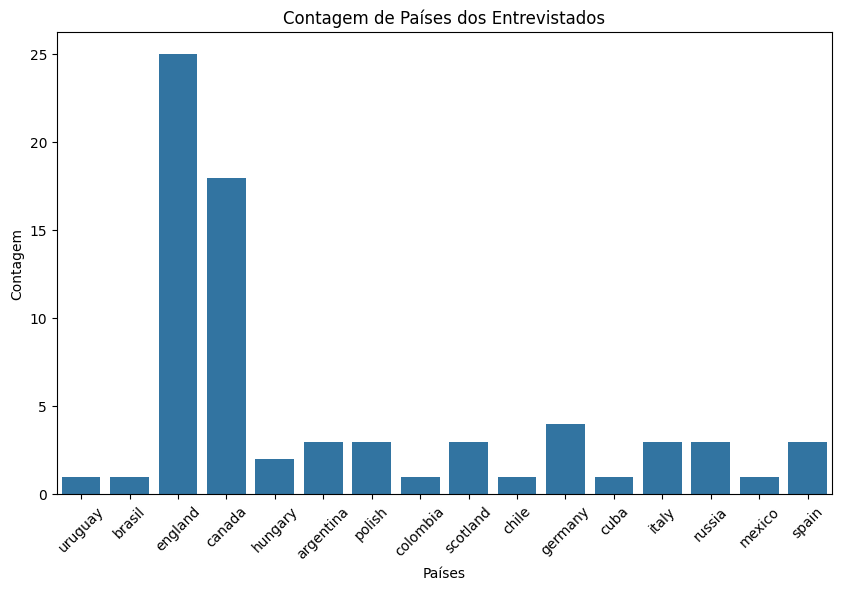

In [924]:
# Histograma dos países
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x ='country')
plt.title('Contagem de Países dos Entrevistados')
plt.xlabel('Países')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

In [925]:
df = pd.get_dummies(df, columns=['country'], drop_first=True)

In [926]:
features2 = df.columns.tolist()
print(features2)

['age', 'returning', 'Tense - relaxed', 'Authoritative -anarchic ', 'Hostile - friendly', 'Proxemics', 'Type of Client', 'sex_le', 'GImg1_indiferent', 'GImg1_likes', 'GImg2_indiferent', 'GImg2_likes', 'GImg3_indiferent', 'GImg3_likes', 'PImg1_likes', 'PImg3_indiferent', 'PImg3_likes', 'PImg4_indiferent', 'PImg4_likes', 'PImg5_indiferent', 'TAudio1_indiferent', 'TAudio1_likes', 'TAudio2_indiferent', 'TAudio3_indiferent', 'TAudio3_likes', 'QAudio1_indiferent', 'QAudio1_likes', 'QAudio2_indiferent', 'QAudio2_likes', 'QAudio3_indiferent', 'QAudio3_likes', 'country_brasil', 'country_canada', 'country_chile', 'country_colombia', 'country_cuba', 'country_england', 'country_germany', 'country_hungary', 'country_italy', 'country_mexico', 'country_polish', 'country_russia', 'country_scotland', 'country_spain', 'country_uruguay']


In [927]:
columns_to_convert2 = ['country_brasil', 'country_canada', 'country_chile', 'country_colombia', 'country_cuba', 'country_england', 'country_germany', 'country_hungary', 'country_italy', 'country_mexico', 'country_polish', 'country_russia', 'country_scotland', 'country_spain', 'country_uruguay']

In [928]:
df[columns_to_convert2] = df[columns_to_convert2].astype(int)

In [929]:
# Returning
df['returning'].unique()



array(['no', 'yes'], dtype=object)

In [930]:
le.fit(df['returning'])
df['returning'] = le.transform(df['returning'])

In [931]:
df['returning'].unique()

array([0, 1])

Na coluna returning, 0 equivaleu a no e 1 equivaleu a yes.

In [932]:
df['Authoritative -anarchic '].unique()

array(['8', '9', '10', '2', '3', '4', '1', '7', '6', '5', 'unknown'],
      dtype=object)

Apesar dos valores dessa coluna parecerem inteiros são objetos, de modo que é fundamental sua transformação.

In [933]:
le = preprocessing.LabelEncoder()
le.fit(df['Authoritative -anarchic '])
df['Authoritative -anarchic '] = le.transform(df['Authoritative -anarchic '])

In [934]:
df['Authoritative -anarchic '].unique()

array([ 8,  9,  1,  2,  3,  4,  0,  7,  6,  5, 10])

In [935]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       73 non-null     int64 
 1   returning                 73 non-null     int64 
 2   Tense - relaxed           73 non-null     int64 
 3   Authoritative -anarchic   73 non-null     int64 
 4   Hostile - friendly        73 non-null     int64 
 5   Proxemics                 73 non-null     object
 6   Type of Client            73 non-null     int64 
 7   sex_le                    73 non-null     int64 
 8   GImg1_indiferent          73 non-null     int64 
 9   GImg1_likes               73 non-null     int64 
 10  GImg2_indiferent          73 non-null     int64 
 11  GImg2_likes               73 non-null     int64 
 12  GImg3_indiferent          73 non-null     int64 
 13  GImg3_likes               73 non-null     int64 
 14  PImg1_likes               73

In [936]:
df['Proxemics'].unique()


array(['C', 'B', 'A', 'D'], dtype=object)

In [937]:
le = preprocessing.LabelEncoder()
le.fit(df['Proxemics'])
df['Proxemics'] = le.transform(df['Proxemics'])

In [938]:
df['Proxemics'].unique()

array([2, 1, 0, 3])

A coluna Proxemics, após a transformação, ficou com 2, equivalente ao C;  1, equivalente ao B; 0, equivalente ao A; e 3 equivalente ao D.

In [939]:
df

,age,returning,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,Proxemics,Type of Client,sex_le,GImg1_indiferent,GImg1_likes,...,country_england,country_germany,country_hungary,country_italy,country_mexico,country_polish,country_russia,country_scotland,country_spain,country_uruguay
0,42,0,4,8,3,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,60,0,2,9,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,25,0,5,1,5,2,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,43,0,3,2,1,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,30,0,3,9,3,2,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,36,0,5,7,4,2,4,0,1,0,...,1,0,0,0,0,0,0,0,0,0
69,38,0,5,2,5,2,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
70,46,0,2,0,2,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,39,0,5,4,4,2,5,1,0,0,...,0,1,0,0,0,0,0,0,0,0


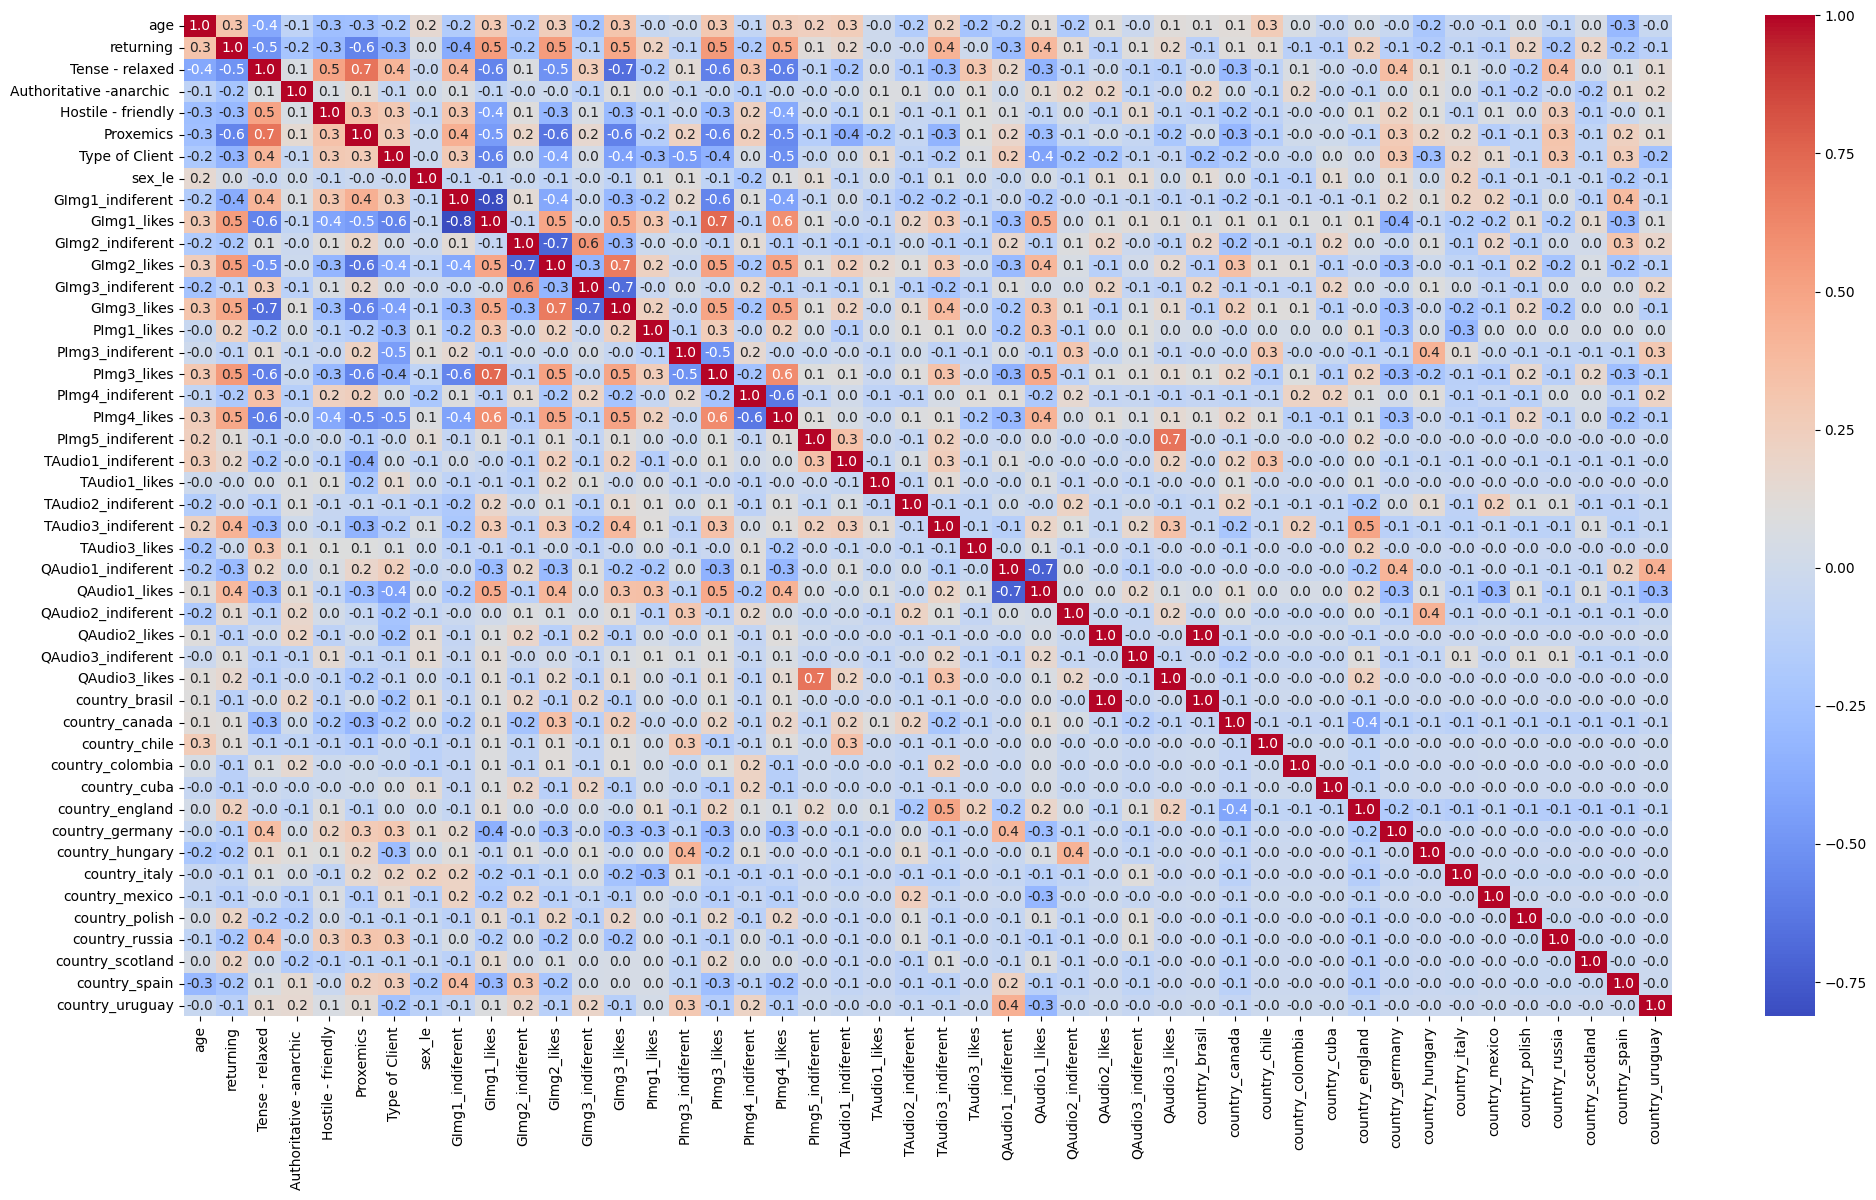

In [940]:
# Heatmap
plt.figure(figsize=(24, 13))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.show()

Após todas as transformações foi possível plotar o heatmap para realizar análises. Ficaram muitas variáveis, o que dificulta a observação mas ainda assim é possível fazer análises com esse gráfico, de forma bem completa. Por exemplo, Tense Relax (tensão/ relaxamento) tem correlação positiva forte de 0.70 com  Proxemics (distanciamento entre as pessoas de acordo com o nível de relação- íntimo, social, público); Plmg_3likes (gosto pela postura neutra)tem correlação forte positiva com Glmg1_likes (gosto pelo aperto de mão), no patamar de 0.74.

###Separação treino/teste

Separação dos valores e dos rótulos da base de dados.

In [941]:
# Definir as colunas de features e o rótulo
X = df.drop(columns=['Type of Client'])  # Features
y = df['Type of Client']  # Rótulo

Separação da base de dados em teste e treino. Use a divisão 75% para treino 25% para teste

In [942]:
from sklearn.model_selection import train_test_split

In [943]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Type of Client']),
                                                    df['Type of Client'],
                                                    test_size=0.25,
                                                    random_state=111)

Dados de treino

Features

In [944]:
X_train

,age,returning,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,Proxemics,sex_le,GImg1_indiferent,GImg1_likes,GImg2_indiferent,...,country_england,country_germany,country_hungary,country_italy,country_mexico,country_polish,country_russia,country_scotland,country_spain,country_uruguay
3,43,0,3,2,1,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
55,30,0,5,9,2,2,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
64,48,0,5,9,6,3,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,60,0,2,9,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
0,42,0,4,8,3,2,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
59,40,0,2,1,3,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
48,34,0,2,2,3,2,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
49,53,1,5,2,2,1,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
52,53,1,1,0,1,1,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
71,39,0,5,4,4,2,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Target

In [945]:
y_train

,Type of Client
3,0
55,4
64,4
1,0
0,0
59,4
48,3
49,3
52,3
71,5


Dados de teste

Features

In [946]:
X_test

,age,returning,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,Proxemics,sex_le,GImg1_indiferent,GImg1_likes,GImg2_indiferent,...,country_england,country_germany,country_hungary,country_italy,country_mexico,country_polish,country_russia,country_scotland,country_spain,country_uruguay
30,45,1,1,3,1,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
62,26,0,4,2,5,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
42,39,0,1,4,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18,67,1,1,6,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
61,56,0,5,2,1,3,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
20,58,1,1,6,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
32,76,1,1,6,1,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
69,38,0,5,2,5,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26,49,1,1,9,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,25,0,5,1,5,2,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


Target

In [947]:
y_test

,Type of Client
30,2
62,4
42,2
18,2
61,4
20,2
32,2
69,5
26,2
2,0


# Normalização das variáveis

In [948]:
from sklearn.preprocessing import StandardScaler

In [949]:
scaler = StandardScaler()

In [950]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [951]:
X_train_scaled

array([[-0.16876039, -1.        ,  0.47886115, ..., -0.19611614,
        -0.24253563, -0.13736056],
       [-1.05286332, -1.        ,  1.8049382 , ..., -0.19611614,
        -0.24253563, -0.13736056],
       [ 0.1712792 , -1.        ,  1.8049382 , ..., -0.19611614,
        -0.24253563, -0.13736056],
       ...,
       [-1.39290292, -1.        , -0.18417737, ..., -0.19611614,
         4.12310563, -0.13736056],
       [ 0.03526336,  1.        , -0.84721589, ..., -0.19611614,
        -0.24253563, -0.13736056],
       [-1.46091083,  1.        ,  1.8049382 , ..., -0.19611614,
        -0.24253563, -0.13736056]])

In [952]:
X_test_scaled

array([[-0.03274455,  1.        , -0.84721589, -0.40869337, -0.88081719,
        -0.02125736, -0.92847669, -0.59160798,  0.7367884 ,  1.5411035 ,
        -1.07703296, -0.62017367,  0.92847669,  0.24253563, -0.41702883,
         0.8291562 ,  1.97714211, -1.16095912, -0.13736056, -0.31943828,
        -0.19611614, -0.53452248,  2.23606798, -0.19611614, -0.31943828,
         0.38592249, -0.4472136 , -0.13736056, -0.4472136 , -0.19611614,
        -0.13736056, -0.56309251,  0.        ,  0.        ,  0.        ,
        -0.70710678, -0.28284271, -0.19611614, -0.24253563, -0.13736056,
        -0.19611614, -0.19611614,  5.09901951, -0.24253563, -0.13736056],
       [-1.324895  , -1.        ,  1.14189968, -0.72397111,  1.91707271,
         1.12663999,  1.07703296,  1.69030851, -1.35724179, -0.64888568,
        -1.07703296, -0.62017367, -1.07703296,  0.24253563, -0.41702883,
        -1.20604538, -0.50578054, -1.16095912, -0.13736056, -0.31943828,
        -0.19611614, -0.53452248, -0.4472136 , -0.

In [953]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
count,5.400000e+01,54.00000,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,54.000000,5.400000e+01,5.400000e+01,...,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01
mean,2.878356e-17,0.00000,1.110223e-16,-1.490577e-16,1.439178e-16,-4.433182e-17,-9.046262e-17,0.000000,2.467162e-17,1.233581e-17,...,8.223874e-17,6.579099e-17,1.233581e-17,-2.158767e-17,2.467162e-17,-4.111937e-18,1.233581e-17,1.233581e-17,-4.523131e-17,2.467162e-17
std,1.009390e+00,1.00939,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390,1.009390e+00,1.009390e+00,...,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00
min,-1.460911e+00,-1.00000,-8.472159e-01,-1.354527e+00,-8.808172e-01,-1.169155e+00,-9.284767e-01,-0.591608,-1.357242e+00,-6.488857e-01,...,-7.071068e-01,-2.828427e-01,-1.961161e-01,-2.425356e-01,-1.373606e-01,-1.961161e-01,-1.961161e-01,-1.961161e-01,-2.425356e-01,-1.373606e-01
25%,-7.808317e-01,-1.00000,-8.472159e-01,-7.239711e-01,-8.808172e-01,-1.169155e+00,-9.284767e-01,-0.591608,-1.357242e+00,-6.488857e-01,...,-7.071068e-01,-2.828427e-01,-1.961161e-01,-2.425356e-01,-1.373606e-01,-1.961161e-01,-1.961161e-01,-1.961161e-01,-2.425356e-01,-1.373606e-01
50%,-2.027643e-01,0.00000,-1.841774e-01,-9.341563e-02,-1.813447e-01,-2.125736e-02,-9.284767e-01,-0.591608,7.367884e-01,-6.488857e-01,...,-7.071068e-01,-2.828427e-01,-1.961161e-01,-2.425356e-01,-1.373606e-01,-1.961161e-01,-1.961161e-01,-1.961161e-01,-2.425356e-01,-1.373606e-01
75%,7.153425e-01,1.00000,4.788612e-01,8.524176e-01,5.181278e-01,1.126640e+00,1.077033e+00,1.119829,7.367884e-01,1.541104e+00,...,1.414214e+00,-2.828427e-01,-1.961161e-01,-2.425356e-01,-1.373606e-01,-1.961161e-01,-1.961161e-01,-1.961161e-01,-2.425356e-01,-1.373606e-01
max,2.347533e+00,1.00000,1.804938e+00,1.798251e+00,2.616545e+00,2.274537e+00,1.077033e+00,1.690309,7.367884e-01,1.541104e+00,...,1.414214e+00,3.535534e+00,5.099020e+00,4.123106e+00,7.280110e+00,5.099020e+00,5.099020e+00,5.099020e+00,4.123106e+00,7.280110e+00


Utilizando o inverse_transform a partir dos dados normalizados para garantir que a normalização está correta.

In [954]:
x_train_inverse = scaler.inverse_transform(X_train_scaled)

#Converter para DataFrame do pandas
df_inverse = pd.DataFrame(x_train_inverse)

# Visualizar as primeiras 5 linhas
print("Dados Invertidos:")
print(df_inverse.head(5))

Dados Invertidos:
     0    1    2    3    4    5    6    7    8    9   ...   35   36   37   38  \
0  43.0  0.0  3.0  2.0  1.0  2.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
1  30.0  0.0  5.0  9.0  2.0  2.0  1.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0   
2  48.0  0.0  5.0  9.0  6.0  3.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
3  60.0  0.0  2.0  9.0  1.0  1.0  1.0  0.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   
4  42.0  0.0  4.0  8.0  3.0  2.0  0.0  0.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   

    39   40   41   42   43   44  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  1.0  

[5 rows x 45 columns]


Analisando os dados originais do X_train.

In [955]:
X_train.head(5)

,age,returning,Tense - relaxed,Authoritative -anarchic,Hostile - friendly,Proxemics,sex_le,GImg1_indiferent,GImg1_likes,GImg2_indiferent,...,country_england,country_germany,country_hungary,country_italy,country_mexico,country_polish,country_russia,country_scotland,country_spain,country_uruguay
3,43,0,3,2,1,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
55,30,0,5,9,2,2,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
64,48,0,5,9,6,3,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,60,0,2,9,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
0,42,0,4,8,3,2,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


Portanto, a normalização está correta, pois a inversão retornou os dados originais, anteriores a normalização. Ademais, tal procedimento foi feito porque é muito recomendável normalizar as variáveis antes de aplicar o KNN (K-Nearest Neighbors). Isso ocorre porque o KNN calcula distâncias entre os pontos de dados, e variáveis em escalas diferentes podem distorcer essas distâncias.

### k-NN

Instanciamento e treinamento do k-NN com diversos valores para os vizinhos. No fim do treino serão calculadas métricas que agreguem ao problema e determinadas as justificativas de utilização.

In [956]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Previsões e avaliações

Avaliação do modelo KNN!

Método de previsão para prever valores usando seu modelo KNN e X_test.

In [957]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 2 2 2 4 2 2 5 1 2 3 2 2 2 2 2 0 1 2]


In [958]:
accuracy = knn.score(X_test, y_test)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.63


O modelo teve acurácia 0.63. É um bom resultado mas pode ser melhorado através da aplicação de outros algoritmos.

Matriz de confusão.

In [959]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score

<Figure size 1600x1200 with 0 Axes>

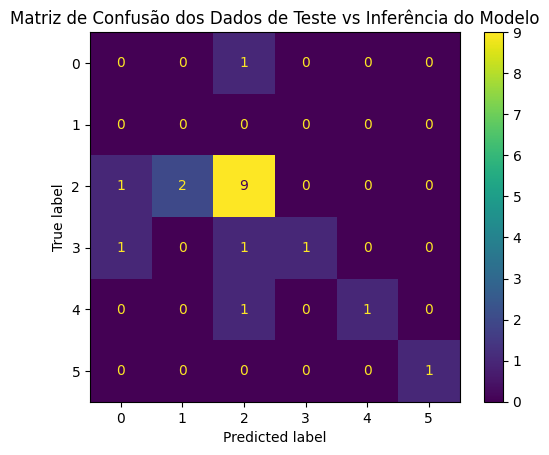

In [960]:

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
unique_labels = np.unique(np.concatenate((y_test, y_pred)))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)

plt.figure(figsize=(16, 12))
cmd.plot()
plt.title("Matriz de Confusão dos Dados de Teste vs Inferência do Modelo")
plt.show()

Métricas do classification report.

Analisando o Classification Report

Dados de teste

In [961]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.75      0.75      0.75        12
           3       1.00      0.33      0.50         3
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1

    accuracy                           0.63        19
   macro avg       0.62      0.43      0.49        19
weighted avg       0.79      0.63      0.68        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Score do modelo utilizando os dados de teste.

In [962]:
knn.score(X=X_test, y=y_test)

0.631578947368421

A classe 1 não teve nenhuma ocorrência e a classe 0 tem apenas uma ocorrência, o que é um sinal de que a classificação está desbalanceada. Isso pode afetar a performance do modelo. O modelo acertou 63% das previsões (accuracy), o que é um desempenho moderado a bom, mas como o desempenho variou entre as classes, o resultado final não foi interessante.

Algumas ações são necessárias para melhorar o modelo, tais como aumentar a quantidade de dados (atualmente há apenas 73 linhas), especialmente para as classes sub-representadas, experimentar técnicas de balanceamento, como oversampling (SMOTE) ou undersampling, ajustar hiperparâmetros do modelo ou testar outros algoritmos de classificação. No presente caso serão ajustados os hiperparametros do modelo bem como testado outro algoritmo de classificação.

#### Curva ROC

In [963]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

In [964]:
label_binarizer = LabelBinarizer().fit(df['Type of Client'])

In [965]:
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(19, 6)

Selecionando a qualidade de número 5 pois foi o maior valor obtido pelo modelo.

In [966]:
class_of_interest = 5
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

5

Calculando as probabilidades dos dados de teste para fazer o cálculo da curva ROC.

In [967]:
y_scores = knn.predict_proba(X_test)

In [968]:
def plot_curva_ROC_one_vs_rest(y_test, y_scores):

  RocCurveDisplay.from_predictions(
      y_onehot_test[:, class_id],
      y_scores[:, class_id],
      name=f"{class_of_interest} vs as demais classes",
  )
  plt.plot([0, 1], [0, 1], "k--", label="valor de threashold (AUC = 0.5)")
  plt.axis("square")
  plt.xlabel("Taxa de Falso Positivo")
  plt.ylabel("Taxa de Verdadeira Positivo")
  plt.title("One-vs-Resto curva ROC")
  plt.legend()
  plt.show()

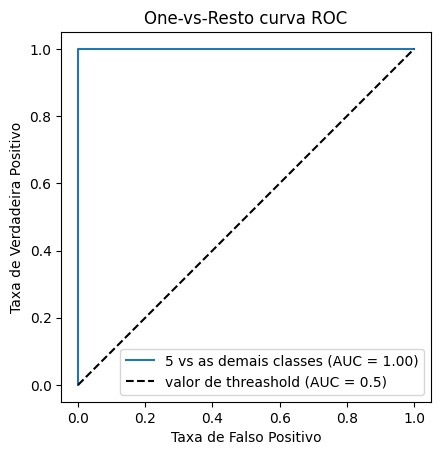

In [969]:
plot_curva_ROC_one_vs_rest(y_test, y_scores)

Embora essa pontuação perfeita pareça ótima (1.00), o que indicaria que o modelo classificou corretamente todas as instâncias positivas e negativas sem erros, pode ser um sinal de overfitting.
Isso também pode indicar que o conjunto de dados não é complexo o suficiente ou que possui uma separabilidade inerente entre as classes. No caso em comento isso tem bastante sentido devido ao tamanho pequeno do dataset, apenas  73 linhas, bem como dos resultados apresentados no "Classification Report" que indicou um desbalanceamento das classes.

Otimizar o valor de K
- Melhor valor de k para o algoritmo k-NN. Utilizado o intervalo de 1 a 30.

In [970]:
def train_modelo(X_train_scaled, X_test_scaled, y_train, k=1):
  print(f"Treinando o k-NN com k={k}")

  # Criação da instância do modelo KNN com n_neighbors=k
  # knn = KNeighborsClassifier(n_neighbors=k)
  knn = KNeighborsRegressor(n_neighbors=k)

  # Ajuste do modelo dos dados de treinamento
  knn.fit(X_train_scaled, y_train)

  # Previsões nos dados de teste
  pred_i = knn.predict(X_test_scaled)

  return pred_i


In [971]:
error_rate = []

for i in range(1,31):
    pred_i = train_modelo(X_train_scaled, X_test_scaled, y_train, i)
    #calcule e armazene os valores de erro para cada modelo treinado
    error = sqrt(mean_squared_error(y_test,pred_i))
    error_rate.append(error)

Treinando o k-NN com k=1
Treinando o k-NN com k=2
Treinando o k-NN com k=3
Treinando o k-NN com k=4
Treinando o k-NN com k=5
Treinando o k-NN com k=6
Treinando o k-NN com k=7
Treinando o k-NN com k=8
Treinando o k-NN com k=9
Treinando o k-NN com k=10
Treinando o k-NN com k=11
Treinando o k-NN com k=12
Treinando o k-NN com k=13
Treinando o k-NN com k=14
Treinando o k-NN com k=15
Treinando o k-NN com k=16
Treinando o k-NN com k=17
Treinando o k-NN com k=18
Treinando o k-NN com k=19
Treinando o k-NN com k=20
Treinando o k-NN com k=21
Treinando o k-NN com k=22
Treinando o k-NN com k=23
Treinando o k-NN com k=24
Treinando o k-NN com k=25
Treinando o k-NN com k=26
Treinando o k-NN com k=27
Treinando o k-NN com k=28
Treinando o k-NN com k=29
Treinando o k-NN com k=30


Média dos resultados obtidos do experimento anterior

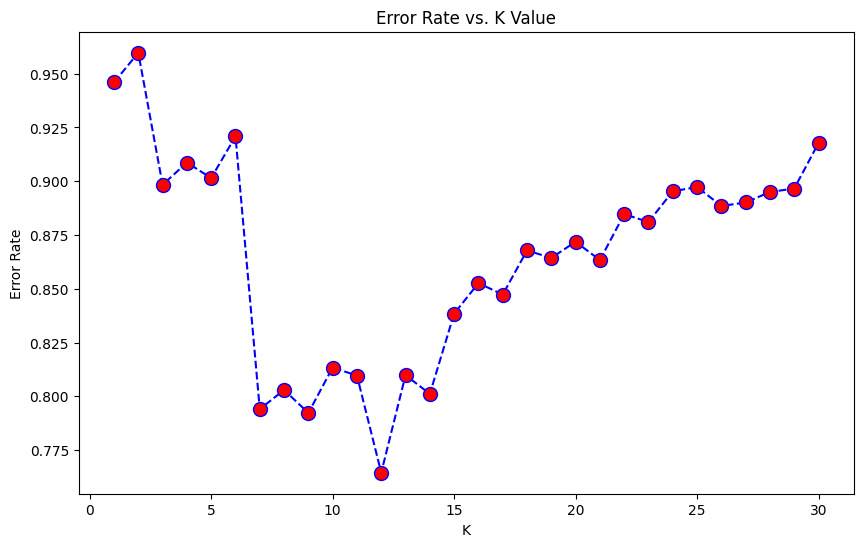

In [972]:
plt.figure(figsize=(10,6))
plt.plot(range(1,31), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Treine um modelo de k-NN com o melhor valor de k obtido e:

1. Plot a matriz de confusão
2. Exiba as métricas do Classification Report para o modelo k-NN


In [973]:
# Função para treinar o modelo k-NN e fazer previsões
def train_modelo(X_train_scaled, X_test_scaled, y_train, n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)  # Obtenha as previsões de rótulo de classe
    return y_pred

# Listas para armazenar resultados
k_values = range(1, 31)
res_score = []

for k in k_values:
    pred_i = train_modelo(X_train_scaled, X_test_scaled, y_train, k)

    #calculo e armazenamento dos valores de score para cada modelo treinado
    score = accuracy_score(y_test, pred_i)  # Calcule a acurácia
    res_score.append(score)  # Armazene o valor de acurácia
    # Impressão da lista de acurácias após o loop
print("Acurácias para cada valor de k:", res_score)

Acurácias para cada valor de k: [0.8947368421052632, 0.8421052631578947, 0.8421052631578947, 0.7894736842105263, 0.8421052631578947, 0.7894736842105263, 0.8421052631578947, 0.7894736842105263, 0.7894736842105263, 0.7368421052631579, 0.7894736842105263, 0.7894736842105263, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.6842105263157895, 0.6842105263157895, 0.6842105263157895, 0.631578947368421, 0.631578947368421, 0.631578947368421]


Os resultados das acurácias ficaram estranhos porque em vários K, a acurácia permaneceu a mesma. Ex. k=2,3,5,7 permaneceu 0.8421052631578947.

In [974]:
# Treine o modelo com k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_3 = knn.predict(X_test_scaled)

print(classification_report(y_test,y_pred_3, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        12
           3       0.75      1.00      0.86         3
           4       0.33      0.50      0.40         2
           5       0.00      0.00      0.00         1

    accuracy                           0.84        19
   macro avg       0.42      0.50      0.45        19
weighted avg       0.79      0.84      0.81        19



Calculando as probabilidades para o modelo de k=3

In [975]:
# Prevendo as probabilidades no conjunto de teste
y_pred_proba_3 = knn.predict_proba(X_test_scaled)

# Exibindo as probabilidades
print(y_pred_proba_3)

[[0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.33333333 0.66666667 0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.66666667 0.33333333 0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.33333333 0.66666667 0.        ]
 [0.         0.         0.33333333 0.66666667 0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         1.        

In [976]:
# Modelo com k=12
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train_scaled, y_train)
y_pred_12 = knn.predict(X_test_scaled)

print(classification_report(y_test,y_pred_12, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.86      1.00      0.92        12
           3       0.50      0.33      0.40         3
           4       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         1

    accuracy                           0.79        19
   macro avg       0.40      0.47      0.42        19
weighted avg       0.69      0.79      0.73        19



Calculando as probabilidades para o modelo de k=12

In [977]:
# Prevendo as probabilidades no conjunto de teste
y_pred_proba_12 = knn.predict_proba(X_test_scaled)

# Exibindo as probabilidades
print(y_pred_proba_12)

[[0.         0.         0.66666667 0.33333333 0.         0.        ]
 [0.         0.         0.16666667 0.33333333 0.41666667 0.08333333]
 [0.         0.08333333 0.91666667 0.         0.         0.        ]
 [0.         0.08333333 0.91666667 0.         0.         0.        ]
 [0.08333333 0.         0.         0.33333333 0.5        0.08333333]
 [0.         0.08333333 0.91666667 0.         0.         0.        ]
 [0.         0.         0.91666667 0.08333333 0.         0.        ]
 [0.08333333 0.         0.08333333 0.25       0.5        0.08333333]
 [0.         0.08333333 0.91666667 0.         0.         0.        ]
 [0.16666667 0.         0.16666667 0.41666667 0.25       0.        ]
 [0.         0.         0.58333333 0.41666667 0.         0.        ]
 [0.         0.08333333 0.91666667 0.         0.         0.        ]
 [0.         0.         0.5        0.41666667 0.08333333 0.        ]
 [0.         0.         0.91666667 0.08333333 0.         0.        ]
 [0.         0.         0.83333333

Apesar da acurácia do modelo de k=3 ter sido mais alta (0.84) do que k = 12 (0.79), não é possível determinar que é um bom modelo para os dados trabalhados. Para ambos os modelo k =3 ou k =12, as classes 0 e 5 não estão sendo reconhecidas pelo modelo, o que pode ser resultado do desbalanceamento nas classes.


<Figure size 1600x1200 with 0 Axes>

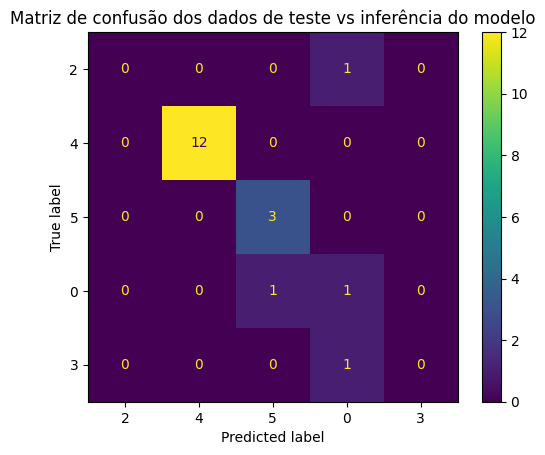

In [978]:
#Matriz de Confusão
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_3)
cmd = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()

CONCLUSÃO: O modelo K-NN não trouxe bons resultados.Apesar das acurácias terem sido aparentemente boas, como a acurácia para k =3 ter sido 0.84, foi notório o desbalanceamento dos dados perante as classes. Dessa forma será testado o Random Forest.

###Random Forest

Instanciamento e treinamento da Random Forest com os parâmetros default do algoritmo.

In [979]:
clf = RandomForestClassifier(random_state=42)

In [980]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [981]:
y_pred= clf.predict(X_test)
y_pred

array([2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 3, 2, 3, 2, 2, 2, 3, 2, 2])

In [982]:
# calculo das Métricas
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Specify the average parameter
precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision: {precision:.2f}')

recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall:.2f}')

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)


Accuracy: 0.89
Precision: 0.50
Recall: 0.60
F1 Score: 0.86
Matriz de Confusão:
[[ 0  0  0  1  0]
 [ 0 12  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  1  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [983]:
print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         2
           5       0.00      0.00      0.00         1

    accuracy                           0.89        19
   macro avg       0.50      0.60      0.53        19
weighted avg       0.84      0.89      0.86        19



<Figure size 1600x1200 with 0 Axes>

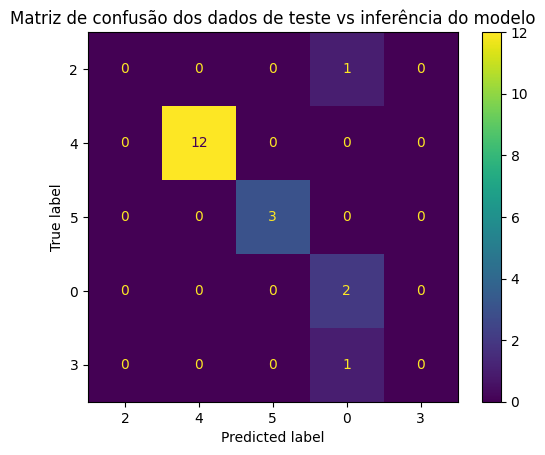

In [984]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()

A acurácia do modelo que utiliza algoritmos de Random Forest com parâmetros default é aparentemente boa (0.89). Todavia, quando analisada as classes 0 e 5, percebe-se que não estão sendo reconhecidas pelo modelo, o que pode ser resultado do desbalanceamento nas classes.

In [985]:
importances = clf.feature_importances_
importances

array([5.78532644e-02, 4.37929439e-02, 6.93277090e-02, 6.67677002e-02,
       2.87061449e-02, 6.45888311e-02, 1.02848711e-02, 3.11838466e-02,
       4.46195816e-02, 2.15658828e-02, 6.17530276e-02, 4.78286465e-02,
       7.82950582e-02, 2.72340041e-03, 3.71467949e-02, 5.32956453e-02,
       3.09202958e-02, 6.67861286e-02, 1.94808993e-05, 3.57167753e-03,
       1.45744547e-03, 1.70564427e-02, 4.26975368e-03, 2.51227733e-03,
       1.21551788e-02, 8.14105493e-03, 2.64237679e-02, 4.98776620e-03,
       9.34550519e-03, 4.00715186e-04, 3.79892165e-03, 2.34829098e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.21788431e-02,
       4.81034581e-03, 1.02429290e-02, 8.82565440e-03, 1.52290775e-03,
       2.06954779e-04, 5.42159864e-03, 1.86685674e-03, 5.48473044e-03,
       4.37650916e-03])

In [986]:
lista_colunas = df.columns.tolist()
print(lista_colunas)

['age', 'returning', 'Tense - relaxed', 'Authoritative -anarchic ', 'Hostile - friendly', 'Proxemics', 'Type of Client', 'sex_le', 'GImg1_indiferent', 'GImg1_likes', 'GImg2_indiferent', 'GImg2_likes', 'GImg3_indiferent', 'GImg3_likes', 'PImg1_likes', 'PImg3_indiferent', 'PImg3_likes', 'PImg4_indiferent', 'PImg4_likes', 'PImg5_indiferent', 'TAudio1_indiferent', 'TAudio1_likes', 'TAudio2_indiferent', 'TAudio3_indiferent', 'TAudio3_likes', 'QAudio1_indiferent', 'QAudio1_likes', 'QAudio2_indiferent', 'QAudio2_likes', 'QAudio3_indiferent', 'QAudio3_likes', 'country_brasil', 'country_canada', 'country_chile', 'country_colombia', 'country_cuba', 'country_england', 'country_germany', 'country_hungary', 'country_italy', 'country_mexico', 'country_polish', 'country_russia', 'country_scotland', 'country_spain', 'country_uruguay']


In [987]:
feature_names = ['age', 'returning', 'Tense - relaxed', 'Authoritative - anarchic',
                 'Hostile - friendly', 'Proxemics', 'sex_le', 'GImg1_indiferent',
                 'GImg1_likes', 'GImg2_indiferent', 'GImg2_likes', 'GImg3_indiferent',
                 'GImg3_likes', 'PImg1_likes', 'PImg3_indiferent', 'PImg3_likes',
                 'PImg4_indiferent', 'PImg4_likes', 'PImg5_indiferent',
                 'TAudio1_indiferent', 'TAudio1_likes', 'TAudio2_indiferent',
                 'TAudio3_indiferent', 'TAudio3_likes', 'QAudio1_indiferent',
                 'QAudio1_likes', 'QAudio2_indiferent', 'QAudio2_likes',
                 'QAudio3_indiferent', 'QAudio3_likes', 'country_brasil',
                 'country_canada', 'country_chile', 'country_colombia',
                 'country_cuba', 'country_england', 'country_germany',
                 'country_hungary', 'country_italy', 'country_mexico',
                 'country_polish', 'country_russia', 'country_scotland',
                 'country_spain', 'country_uruguay']

Text(0.5, 0, 'Importância')

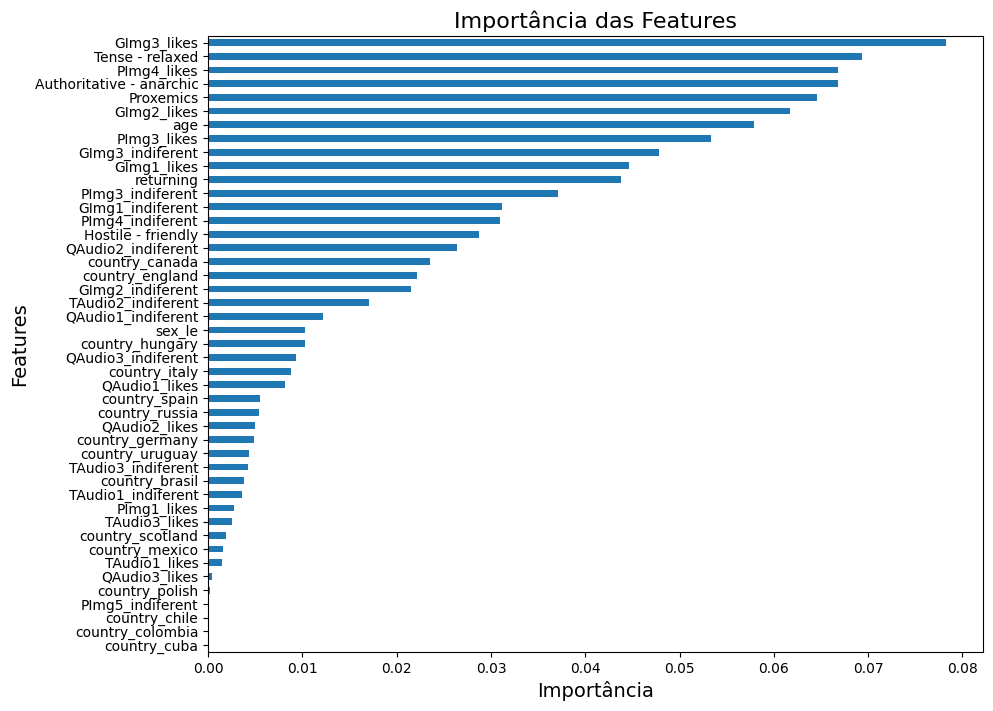

In [988]:
plt.figure(figsize=(10, 8))
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)
forest_importances.plot.barh()
plt.title('Importância das Features', fontsize=16)
plt.ylabel('Features', fontsize=14)
plt.xlabel('Importância', fontsize=14)

# Utilizando e analisando feature selection do modelo Random Forest via SelectFromModel (EXTRA)

In [989]:
selector = SelectFromModel(estimator=RandomForestClassifier())

In [990]:
selector.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [991]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [992]:
selector.threshold_

0.022222222222222223

In [993]:
#valores selecionados
np.sum(selector.get_support())

16

## Grid Search

Faça um grid search dos parâmetros da **Random Forest**:
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
4. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

Links de referência:
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
2. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [994]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Existem 4320 possíveis configurações, provenientes da combinação de diferentes características (2 * 12 * 2 * 3 * 3 * 10 = 4320 configurações). Portanto, há o benefício da busca aleatória, pois não tenta-se cada combinação, mas é realizada seleção aleatoria para amostrar uma ampla gama de valores.

Exibição da média dos resultados obtidos do experimento anterior

In [995]:
# Média dos valores numéricos
medias = {}

# Calculo da média para n_estimators
medias['n_estimators'] = np.mean(random_grid['n_estimators'])

# Calculo da média para max_depth (excluindo None)
max_depth_numerico = [x for x in random_grid['max_depth'] if x is not None]
medias['max_depth'] = np.mean(max_depth_numerico)

# Calculo da média para min_samples_split
medias['min_samples_split'] = np.mean(random_grid['min_samples_split'])

# Calculo da média para min_samples_leaf
medias['min_samples_leaf'] = np.mean(random_grid['min_samples_leaf'])

# Exibição das médias
print("Médias dos parâmetros numéricos:")
print("n_estimators:", medias['n_estimators'])
print("max_depth:", medias['max_depth'])
print("min_samples_split:", medias['min_samples_split'])
print("min_samples_leaf:", medias['min_samples_leaf'])

Médias dos parâmetros numéricos:
n_estimators: 1100.0
max_depth: 60.0
min_samples_split: 5.666666666666667
min_samples_leaf: 2.3333333333333335


Treinamento de um modelo de Random Forest com os melhores valores dos parâmetros obtidos:

1. Exibição das métricas do Classification Report
2. Plot da matriz de confusão

In [996]:
# Treinamento do Random Search

# Criação da base do modelo
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [997]:
# Melhores parâmetros

rf_random.best_params_


{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

**Avaliação da Busca Aleatória".**

In [998]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    errors = abs(y_pred - y_test)

    # Calcular acurácia
    accuracy = accuracy_score(y_test, y_pred) * 100

    # Calcular precisão, recall e F1 Score
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0) * 100
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0) * 100
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0) * 100

    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Precision = {:0.2f}%.'.format(precision))
    print('Recall = {:0.2f}%.'.format(recall))
    print('F1 Score = {:0.2f}%.'.format(f1))

    return accuracy

# Criação e ajuste do modelo base
base_model = RandomForestClassifier(n_estimators=5, random_state=42)
base_model.fit(X_train, y_train)

# Avaliação do modelo base
base_accuracy = evaluate(base_model, X_test, y_test)

# Melhor modelo encontrado pela busca aleatória
best_random = rf_random.best_estimator_

# Avaliação do melhor modelo da busca aleatória
random_accuracy = evaluate(best_random, X_test, y_test)

# Calculo e exibição da melhoria
print('Improvement of {:0.2f}%.'.format(100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Accuracy = 84.21%.
Precision = 85.79%.
Recall = 84.21%.
F1 Score = 82.78%.
Model Performance
Accuracy = 89.47%.
Precision = 84.21%.
Recall = 89.47%.
F1 Score = 85.96%.
Improvement of 6.25%.


In [999]:
# Previsões com o melhor modelo
y_pred = best_random.predict(X_test)

In [1000]:
print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         3
           4       0.50      1.00      0.67         2
           5       0.00      0.00      0.00         1

    accuracy                           0.89        19
   macro avg       0.50      0.60      0.53        19
weighted avg       0.84      0.89      0.86        19



<Figure size 1600x1200 with 0 Axes>

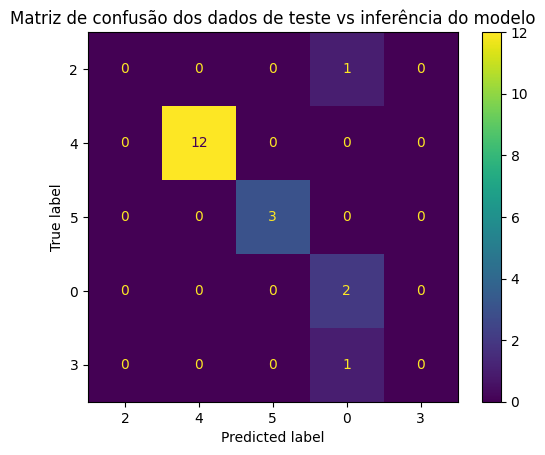

In [1001]:
#Matriz de confusão
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()

## Conclusão

O presente trabalho realizou análise exploratória dos dados para compreensão inicial, transformações e tratamento dos dados, divisão dos dados em duas partes: treino e teste, treinamento de modelos de classificação em K-NN e Random Forest, assim como foi realizado grid search dos parâmetros da Random Forest.

Os dados foram carregados, as bibliotecas necessárias foram importadas, os dados explorados e transformados.

Na parte da exploração dos dados (EDA), foi possível verificar que as vinte e três colunas tinham dados nas 73 linhas (pequena amostra), de modo que não se tornou imprescindível a limpeza dos mesmos. Apenas foi transformado o simbólo ? para o termo unknown (desconhecido) e posteriormente tais linhas foram removidas devido a pouca significância para o modelo, no sentido quantitativo (3).

Dentre as características do dataset, a idade média dos entrevistados foi 47 anos, 38 mulheres e 33 homens, nascidos principalmente na Inglaterra e no Canadá.

Os valores categóricos Male, Female, Indifferent, likes, dislikes foram transformados para valores numéricos, bem como ocorreram transformações nas colunas country, returning, Authoritative -anarchic e Proxemics.

O gráfico de correlação demonstrou que as colunas Tense Relax (tensão/ relaxamento) tem correlação positiva forte de 0.70 com Proxemics (distanciamento entre as pessoas de acordo com o nível de relação- íntimo, social, público); e Plmg_3likes (gosto pela postura neutra)tem correlação forte positiva com Glmg1_likes (gosto pelo aperto de mão), no patamar de 0.74.

Ocorreu a divisão dos dados em treino e teste, bem como a respectiva normalização (via StandardScaler) e transformação para o formato padronizado(via transform). Pode-se concluir que a normalização estava correta, pois através da técnica da inversão, os dados retornaram exatamente aos dados originais.

Ocorreu a aplicação da técnica do K-NN e a avaliação via X_test e Y_test, cuja acurácia do modelo foi 0.63. Foram aplicadas a matriz de confusão e o relatório de classificação, com resultados para precisão, recall, f1-score e support.

Também foi realizada análise via curva ROC e para isso foi realizada transformações binárias. A análise selecionou o número 5 pois foi o maior valor obtido pelo modelo, tido como o de maior qualidade.

Após essas análises, foi possível observar que a classe 1 não teve nenhuma ocorrência e a classe 0 teve apenas uma ocorrência, o que é um sinal que a classificação está desbalanceada. E isso pode afetar a performance do modelo. Dessa forma, apesar do modelo ter acertado 63% das previsões (accuracy), o que é um desempenho moderado a bom, o desempenho variou bastante entre as classes devido ao desbalanceamento, de modo que não foi um bom resultado.

Algumas ações foram realizadas para buscar melhorar o modelo como ajustes dos hiperparametros do modelo bem como testes em outros algoritmos de classificação.

Primeiro, houve a tentativa de escolher um bom valor K e treinar o modelo, com K = 3 e K = 12. Os resultados das acurácias ficaram estranhos porque em vários K, a acurácia permaneceu a mesma. Ex. k=2,3,5,7 permaneceu 0.8421052631578947. Apesar disso, o modelo foi treinado para k =3 e K =12. Nessa senda, constatou-se que o modelo K-NN não trouxe bons resultados: apesar das acurácias terem sido aparentemente boas, o desbalanceamento dos dados perante as classes foi notório.

Segundo, ocorreu o treinamento através dos algoritmos de Random Forest com parâmetros default. Sua acurácia foi aparentemente boa (0.89) mas quando analisadas as classes 0 e 5, percebeu-se que não estão sendo reconhecidas pelo modelo, o que pode ser resultado do desbalanceamento nas classes. Também foi plotado um gráfico sobre a importância das features.

Terceiro, foi criado o grid search dos parâmetros da Random Forest, bem como tirada a média de alguns resultados. Também foi treinado o modelo de Random Forest com os melhores valores dos parâmetros obtidos e exibidas as métricas do classification Report e da matriz de confusão. A acurácia foi boa: 0,89 mas o desbalanceamento dos dados nas classes continuou.

Enfim, apesar de ter buscado formas de otimizar o modelo, o que resultou em melhores acurácias ao longo dos algoritmos, o desbalanceamento dos dados perante as classes prejudicou a robustez do modelo, pois afetou negativamente o seu desempenho no aprendizado de máquina. Dados desbalanceados tendem a favorecer a classe majoritária, resultando em baixa precisão e recall para a classe minoritária, um possível overfitting em que o modelo aprende a representar apenas a classe majoritária, altas taxas de falso positivo e  dificuldade em ajustar hiperparâmetros.

Portanto, para melhorar esse modelo e torná-lo mais justo e eficaz seria fundamental a reamostragem: aumentar a classe minoritária (oversampling) ou diminuir a classe majoritária (undersampling), bem como gerar dados sintéticos: técnicas como SMOTE (Synthetic Minority Over-sampling Technique) podem ser usadas para gerar novos exemplos da classe minoritária.


